# Arabic Handwritten Recognition

## Overview
The automatic recognition of text on scanned images has enabled many applications such as searching for words in large volumes of documents, automatic sorting of postal mail, and convenient editing of previously printed documents.

The domain of handwriting in the Arabic script presents unique technical challenges and has been addressed more recently than other domains. Many different methods have been proposed and applied to various types of images.

Here we will focus on the recognition part of handwritten Arabic letters and digits recognition that face several challenges, including the unlimited variation in human handwriting and the large public databases.

In this project we will employ several deep learning models to classify a the images to an arabic letter.



## Dataset
The dataset for this project originates from kaggle kernels which include 
**[Arabic Letters](https://www.kaggle.com/mloey1/ahcd1)**.

All the datasets are CSV files representing the image pixels values and their corresponding label.

Here are some more details about the datasets:

* **Arabic Letters Dataset is composed of 16,800 characters written by 60 participants**, the age range is between 19 to 40 years, and 90% of participants are right-hand. Each participant wrote each character (from ’alef’ to ’yeh’) ten times. The images were scanned at the resolution of 300 dpi. Each block is segmented automatically using Matlab 2016a to determining the coordinates for each block. **The dataset is partitioned into two sets: a training set of 13,440 characters to 480 images per class and a test set of 3,360 characters to 120 images per class**. Writers of training set and test set are exclusive. Ordering of including writers to test set are randomized to make sure that writers of test set are not from a single institution to ensure variability of the test set.

## Data Exploration


1. We need to mount to google drive to be able to use the uploaded dataset files.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Import libraries necessary for this project.


In [ ]:
# Import main libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import libraries needed for reading image and processing it
import csv
from PIL import Image
from scipy.ndimage import rotate

# Pretty display for notebooks
%matplotlib inline

3. Load the dataset files into dataframes to be used later in the project

### Loading Arabic Letters Dataset

In [ ]:
# Training letters images and labels files
letters_training_images_file_path = "drive/My Drive/ML Project/Datasets/Arabic Handwritten Characters Dataset CSV/training images.zip"
letters_training_labels_file_path = "drive/My Drive/ML Project/Datasets/Arabic Handwritten Characters Dataset CSV/training labels.zip"
# Testing letters images and labels files
letters_testing_images_file_path = "drive/My Drive/ML Project/Datasets/Arabic Handwritten Characters Dataset CSV/testing images.zip"
letters_testing_labels_file_path = "drive/My Drive/ML Project/Datasets/Arabic Handwritten Characters Dataset CSV/testing labels.zip"

# Loading dataset into dataframes
training_letters_images = pd.read_csv(letters_training_images_file_path, compression='zip', header=None)
training_letters_labels = pd.read_csv(letters_training_labels_file_path, compression='zip', header=None)
testing_letters_images = pd.read_csv(letters_testing_images_file_path, compression='zip', header=None)
testing_letters_labels = pd.read_csv(letters_testing_labels_file_path, compression='zip', header=None)

# print statistics about the dataset
print("There are %d training arabic letter images of 64x64 pixels." %training_letters_images.shape[0])
print("There are %d testing arabic letter images of 64x64 pixels." %testing_letters_images.shape[0])
training_letters_images.head()

There are 13440 training arabic letter images of 64x64 pixels.
There are 3360 testing arabic letter images of 64x64 pixels.


,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Convert csv values to an image 
Writting a method to be used later if we want visualization of an image from its pixels values.

In [ ]:
def convert_values_to_image(image_values, display=False):
  image_array = np.asarray(image_values)
  image_array = image_array.reshape(64, 64).astype('uint8')
  # The original dataset is reflected so we will flip it then rotate for a better view only.
  image_array = np.flip(image_array, 0)
  image_array = rotate(image_array, -90)
  new_image = Image.fromarray(image_array)
  if display == True:
    new_image.show()
  return new_image

In [ ]:
def convert_values_to_image_wtf(image_values, display=False):
  image_array = np.asarray(image_values)
  image_array = image_array.reshape(64, 64).astype('uint8')
  # The original dataset is reflected so we will flip it then rotate for a better view only.
  # image_array = np.flip(image_array, 0)
  #image_array = rotate(image_array, -90)
  new_image = Image.fromarray(image_array)
  if display == True:
    new_image.show()
  return new_image

### Visualizing some examples

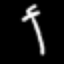

In [ ]:
convert_values_to_image(training_letters_images.loc[0], True)

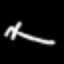

In [ ]:
convert_values_to_image_wtf(training_letters_images.loc[0], True)

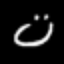

In [ ]:
convert_values_to_image(training_letters_images.loc[16], True)

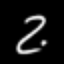

In [ ]:
convert_values_to_image(training_letters_images.loc[37], True)

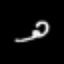

In [ ]:
convert_values_to_image(training_letters_images.loc[4008], True)

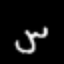

In [ ]:
convert_values_to_image(training_letters_images.loc[3000], True)

## Data Preprocessing

### Image Normalization
We rescale the images by dividing every pixel in the image by 255 to make them into range [0, 1]

In [ ]:
training_letters_images_scaled = training_letters_images.values.astype('float32')/255
training_letters_labels = training_letters_labels.values.astype('int32')
testing_letters_images_scaled = testing_letters_images.values.astype('float32')/255
testing_letters_labels = testing_letters_labels.values.astype('int32')

In [ ]:
print("Training images of letters after scaling")
print(training_letters_images_scaled.shape)
training_letters_images_scaled[0:5]

Training images of letters after scaling
(13440, 4096)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Encoding Categorical Labels
From the labels csv files we can see that labels are categorical values and it is a multi-class classification problem. 

Our outputs are in the form of:
* Letters from ’alef’ to ’yeh’ have categories numbers from 10 to 37. Then we will convert it from 0 to 27

**Here we will encode these categories values using One Hot Encoding with keras.**

One-hot encoding transforms integer to a binary matrix where the array contains only one ‘1’ and the rest elements are ‘0’.



In [ ]:
from tensorflow.keras.utils import to_categorical

# one hot encoding
# number of classes = 10 (digits classes) + 28 (arabic alphabet classes)
number_of_classes = 38
training_letters_labels_encoded = to_categorical(training_letters_labels, num_classes=number_of_classes)
testing_letters_labels_encoded = to_categorical(testing_letters_labels, num_classes=number_of_classes)

In [ ]:
index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
training_letters_labels_encoded_28 = []
for i in range (len(training_letters_labels_encoded)):
  training_letters_labels_encoded_28.append(np.delete(training_letters_labels_encoded[i], index))

training_letters_labels_encoded_28_arr = np.array(training_letters_labels_encoded_28)

In [ ]:
testing_letters_labels_encoded_28 = []
for i in range (len(testing_letters_labels_encoded)):
  testing_letters_labels_encoded_28.append(np.delete(testing_letters_labels_encoded[i], index))

testing_letters_labels_encoded_28_arr = np.array(testing_letters_labels_encoded_28)

In [ ]:
print(training_letters_labels_encoded_28_arr)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


### Reshaping Input Images to 64x64x1


When using TensorFlow as backend, Keras CNNs require a 4D array (which we'll also refer to as a 4D tensor) as input, with shape
(nb_samples,rows,columns,channels)

where nb_samples corresponds to the total number of images (or samples), and rows, columns, and channels correspond to the number of rows, columns, and channels for each image, respectively.

**So we will reshape the input images to a 4D tensor with shape
(nb_samples, 64, 64 ,1)** as we use grayscale images of 64x64 pixels.

In [ ]:
# reshape input letter images to 64x64x1
training_letters_images_scaled = training_letters_images_scaled.reshape([-1, 64, 64, 1])
testing_letters_images_scaled = testing_letters_images_scaled.reshape([-1, 64, 64, 1])

print(training_letters_images_scaled.shape, training_letters_labels_encoded_28_arr.shape, testing_letters_images_scaled.shape, testing_letters_labels_encoded_28_arr.shape)

(13440, 64, 64, 1) (13440, 28) (3360, 64, 64, 1) (3360, 28)


### Merging Letters and Digits Datasets

In [ ]:
training_data_images = training_letters_images_scaled 
training_data_labels = training_letters_labels_encoded_28_arr
print("Total Training images are {} images of shape".format(training_data_images.shape[0]))
print(training_data_images.shape, training_data_labels.shape)


testing_data_images = testing_letters_images_scaled
testing_data_labels = testing_letters_labels_encoded_28_arr
print("Total Testing images are {} images of shape".format(testing_data_images.shape[0]))
print(testing_data_images.shape, testing_data_labels.shape)


Total Training images are 13440 images of shape
(13440, 64, 64, 1) (13440, 28)
Total Testing images are 3360 images of shape
(3360, 64, 64, 1) (3360, 28)


## Designing Model Architecture

Now we will make a method which creates the model architecture with the specified optimizer and activation functions.

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Dropout, Dense

def create_model(optimizer='adam', kernel_initializer='he_normal', activation='relu'):
  # create model
  model = Sequential()
  model.add(Conv2D(filters=16, kernel_size=3, padding='same', input_shape=(64, 64, 1), kernel_initializer=kernel_initializer, activation=activation))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters=32, kernel_size=3, padding='same', kernel_initializer=kernel_initializer, activation=activation))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer=kernel_initializer, activation=activation))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer=kernel_initializer, activation=activation))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.2))
  model.add(GlobalAveragePooling2D())
  
  #Fully connected final layer
  model.add(Dense(28, activation='softmax'))

  # Compile model
  model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
  return model

Let’s understand above code step by step.

* The first hidden layer is a convolutional layer. The layer has 16 feature maps, which with the size of 3×3 and an activation function which is relu. This is the input layer, expecting images with the structure outlined above.
* The second layer is Batch Normalization which solves having distributions of the features vary across the training and test data, which breaks the IID assumption. We use it to help in two ways faster learning and higher overall accuracy. 
* The third layer is the MaxPooling layer. MaxPooling layer is used to down-sample the input to enable the model to make assumptions about the features so as to reduce overfitting. It also reduces the number of parameters to learn, reducing the training time.
* The next layer is a Regularization layer using dropout. It is configured to randomly exclude 20% of neurons in the layer in order to reduce overfitting.
* Another hidden layer with 32 feature maps with the size of 3×3 and a relu activation function to capture more features from the image.
* Other hidden layers with 64 and 128 feature maps with the size of 3×3 and a relu activation function to capture complex patterns from the image which will decribe the digits and letters later.
* More MaxPooling, Batch Normalization, Regularization and GlobalAveragePooling2D layers.
* The last layer is the output layer with 28 neurons (number of output classes) and it uses softmax activation function as we have multi-classes. Each neuron will give the probability of that class.

I used categorical_crossentropy as a loss function because its a multi-class classification problem. I used accuracy as metrics to improve the performance of our neural network.

## Model Summary And Visualization

Let's see the model summary.

In [ ]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        160       
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 16)       64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       1

Keras support plotting the model in keras.utils.vis_utils module which provides utility functions to plot a Keras model using graphviz.

To be able to use that utility we should first install pydot and graphviz modules. This can be done by running the following code cell then restart the runtime environment.

In [ ]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot

Now we can plot the model and save it to a file also.

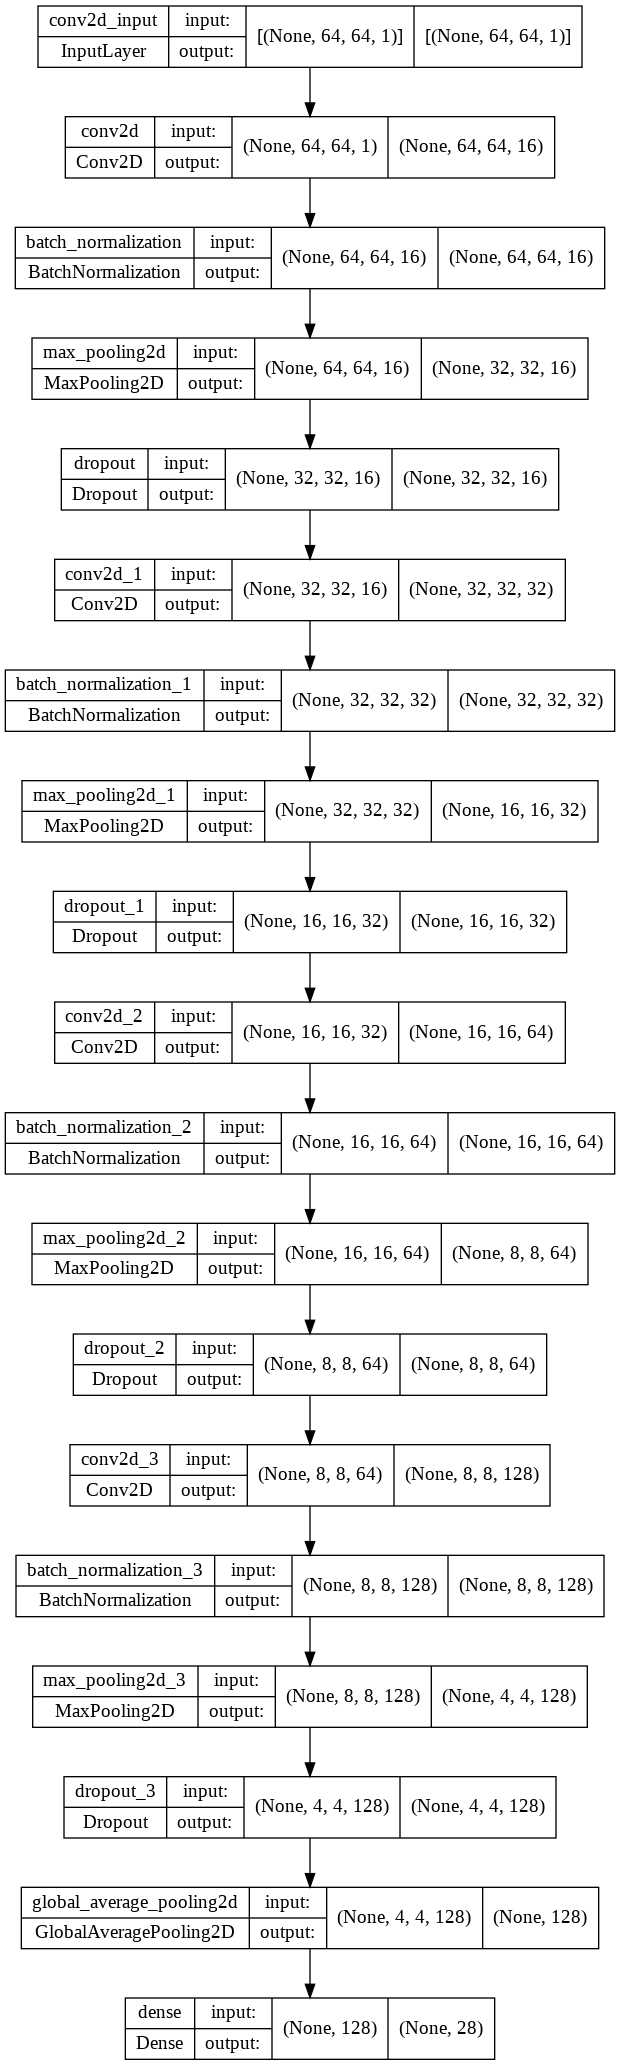

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file="model.png", show_shapes=True)
from IPython.display import Image as IPythonImage
display(IPythonImage('model.png'))

## Parameters Tuning

**From the results of pre defined model we can see that best parameters are:**
* **Optimizer: Adam**
* **Kernel_initializer: uniform**
* **Activation: relu** 

Let's create the model with the best parameters obtained.

In [ ]:
model = create_model(optimizer='Adam', kernel_initializer='uniform', activation='relu')

## Training the Model


### Fitting the Model

Train the model using batch_size=20 to reduce used memory and make the training more quick.
We will train the model first on 10 epochs to see the accuracy that we will obtain.

In [ ]:
from keras.callbacks import ModelCheckpoint  

# using checkpoints to save model weights to be used later instead of training again on the same epochs.
checkpointer = ModelCheckpoint(filepath='weights.hdf5', verbose=1, save_best_only=True)
history = model.fit(training_data_images, training_data_labels, 
                    validation_data=(testing_data_images, testing_data_labels),
                    epochs=10, batch_size=20, verbose=1, callbacks=[checkpointer])

Epoch 1/10
672/672 [==============================] - ETA: 0s - loss: 1.3728 - accuracy: 0.6289
Epoch 1: val_loss improved from inf to 2.62958, saving model to weights.hdf5
672/672 [==============================] - 22s 16ms/step - loss: 1.3728 - accuracy: 0.6289 - val_loss: 2.6296 - val_accuracy: 0.1378
Epoch 2/10
667/672 [============================>.] - ETA: 0s - loss: 0.4050 - accuracy: 0.8956
Epoch 2: val_loss improved from 2.62958 to 0.86714, saving model to weights.hdf5
672/672 [==============================] - 7s 10ms/step - loss: 0.4040 - accuracy: 0.8958 - val_loss: 0.8671 - val_accuracy: 0.8188
Epoch 3/10
672/672 [==============================] - ETA: 0s - loss: 0.2739 - accuracy: 0.9228
Epoch 3: val_loss improved from 0.86714 to 0.28942, saving model to weights.hdf5
672/672 [==============================] - 9s 14ms/step - loss: 0.2739 - accuracy: 0.9228 - val_loss: 0.2894 - val_accuracy: 0.9116
Epoch 4/10
670/672 [============================>.] - ETA: 0s - loss: 0.2211

## Saving the Final Model

In [ ]:
!pip install tensorflowjs
import keras
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model, './tfjs_models')
!zip -r ./tfjs_files_digit_only.zip ./tfjs_models/
from google.colab import files
files.download("./tfjs_files_digit_only.zip")

     |████████████████████████████████| 77 kB 6.7 MB/s 
     |████████████████████████████████| 462 kB 53.1 MB/s 
  adding: tfjs_models/ (stored 0%)
  adding: tfjs_models/model.json (deflated 87%)
  adding: tfjs_models/group1-shard1of1.bin (deflated 7%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Plotting Loss and Accuracy Curves with Epochs

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_accuracy(history):
  # Loss Curves
  plt.figure(figsize=[8,6])
  plt.plot(history.history['loss'],'r',linewidth=3.0)
  plt.plot(history.history['val_loss'],'b',linewidth=3.0)
  plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
  plt.xlabel('Epochs ',fontsize=16)
  plt.ylabel('Loss',fontsize=16)
  plt.title('Loss Curves',fontsize=16)

  # Accuracy Curves
  plt.figure(figsize=[8,6])
  plt.plot(history.history['accuracy'],'r',linewidth=3.0)
  plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
  plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
  plt.xlabel('Epochs ',fontsize=16)
  plt.ylabel('Accuracy',fontsize=16)
  plt.title('Accuracy Curves',fontsize=16) 

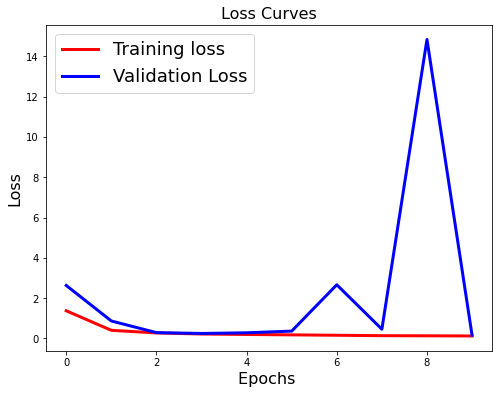

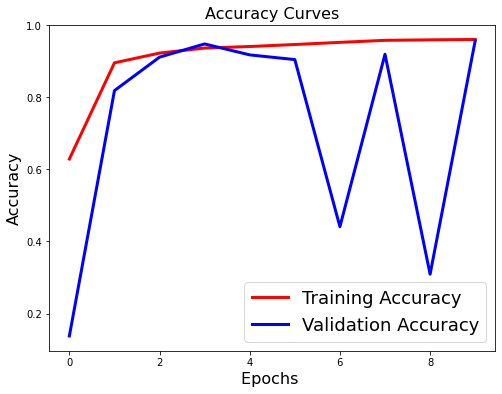

In [ ]:
plot_loss_accuracy(history)

### Load the Model with the Best Validation Loss


In [ ]:
model.load_weights('weights.hdf5')

## Test the Model


In [ ]:
# Final evaluation of the model
metrics = model.evaluate(testing_data_images, testing_data_labels, verbose=1)
print("Test Accuracy: {}".format(metrics[1]))
print("Test Loss: {}".format(metrics[0]))

105/105 [==============================] - 1s 7ms/step - loss: 0.1555 - accuracy: 0.9568
Test Accuracy: 0.956845223903656
Test Loss: 0.15552979707717896


**We get test accuracy of 95.68% after training on 10 epochs only.**


## Training More on the best model

Epoch 1/20
669/672 [============================>.] - ETA: 0s - loss: 0.1165 - accuracy: 0.9631
Epoch 1: val_loss improved from inf to 0.27627, saving model to weights.hdf5
672/672 [==============================] - 8s 12ms/step - loss: 0.1161 - accuracy: 0.9632 - val_loss: 0.2763 - val_accuracy: 0.9003
Epoch 2/20
667/672 [============================>.] - ETA: 0s - loss: 0.1204 - accuracy: 0.9615
Epoch 2: val_loss improved from 0.27627 to 0.16504, saving model to weights.hdf5
672/672 [==============================] - 7s 10ms/step - loss: 0.1199 - accuracy: 0.9617 - val_loss: 0.1650 - val_accuracy: 0.9512
Epoch 3/20
671/672 [============================>.] - ETA: 0s - loss: 0.1085 - accuracy: 0.9679
Epoch 3: val_loss did not improve from 0.16504
672/672 [==============================] - 6s 9ms/step - loss: 0.1084 - accuracy: 0.9679 - val_loss: 0.3750 - val_accuracy: 0.8994
Epoch 4/20
667/672 [============================>.] - ETA: 0s - loss: 0.1066 - accuracy: 0.9658
Epoch 4: val_los

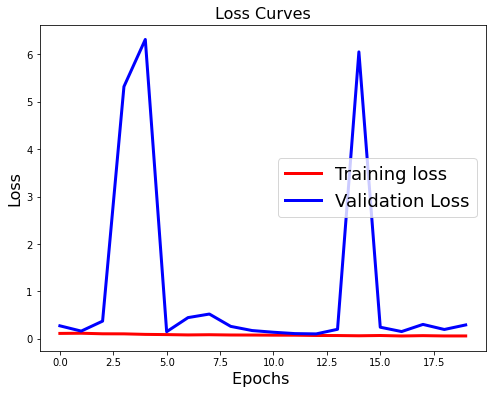

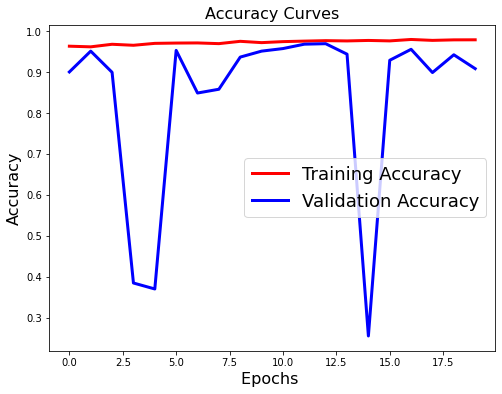

In [ ]:
epochs = 20
batch_size = 20

checkpointer = ModelCheckpoint(filepath='weights.hdf5', verbose=1, save_best_only=True)

history = model.fit(training_data_images, training_data_labels, 
                    validation_data=(testing_data_images, testing_data_labels),
                    epochs=epochs, batch_size=batch_size, verbose=1, callbacks=[checkpointer])
          
model.load_weights('weights.hdf5')
plot_loss_accuracy(history)

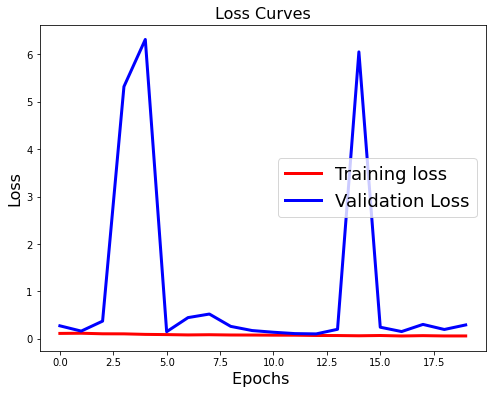

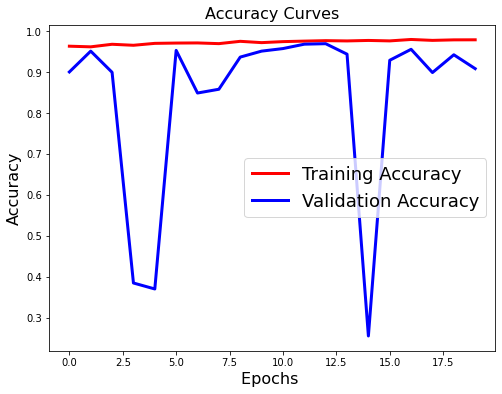

In [ ]:
plot_loss_accuracy(history)

## Testing the Model again

In [ ]:
# Final evaluation of the model
metrics = model.evaluate(testing_data_images, testing_data_labels, verbose=1)
print("Test Accuracy: {}".format(metrics[1]))
print("Test Loss: {}".format(metrics[0]))

105/105 [==============================] - 1s 7ms/step - loss: 0.1060 - accuracy: 0.9693
Test Accuracy: 0.969345211982727
Test Loss: 0.10598547011613846


After training the model on more epochs we gained a better model which can classify complex patterns . So when we tested it on our test dataset we had better results than before.

**Test accuracy is improved from 95.68% to 96.93% As we train the model on 20 more epochs.**



## Saving the Final Model

Save the model weights to file.

In [ ]:
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


## Benchmark Model

We will use a very simple (vanilla) CNN model as benchmark and Train/test it using the same data that you have used for our model solution.
Then Compare the results between the vanilla model and our complex model.

In [ ]:
baseline_model = Sequential()
baseline_model.add(Conv2D(filters=16, kernel_size=3, padding='same', input_shape=(64, 64, 1), activation='relu')) # Input layer
baseline_model.add(GlobalAveragePooling2D())
baseline_model.add(Dense(28, activation = 'softmax')) # Output layer => output dimension = 38 as it is multi-class

# Compile the baseline model
baseline_model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='Adam')

# Fit the baseline model with training dataset
epochs = 5
batch_size = 20

baseline_model.fit(training_data_images, training_data_labels, 
                  validation_data=(testing_data_images, testing_data_labels),
                  epochs=epochs, batch_size=batch_size, verbose=1)

# Test the baseline model
baseline_metrics = baseline_model.evaluate(testing_data_images, testing_data_labels, verbose=1)
print("Baseline Model Test Accuracy: {}".format(baseline_metrics[1]))
print("Baseline Model Test Loss: {}".format(baseline_metrics[0]))


Epoch 1/5
672/672 [==============================] - 7s 9ms/step - loss: 3.3231 - accuracy: 0.0335 - val_loss: 3.3022 - val_accuracy: 0.0357
Epoch 2/5
672/672 [==============================] - 4s 6ms/step - loss: 3.2817 - accuracy: 0.0418 - val_loss: 3.2502 - val_accuracy: 0.0545
Epoch 3/5
672/672 [==============================] - 3s 5ms/step - loss: 3.2167 - accuracy: 0.0685 - val_loss: 3.1763 - val_accuracy: 0.0667
Epoch 4/5
672/672 [==============================] - 3s 5ms/step - loss: 3.1531 - accuracy: 0.0734 - val_loss: 3.1214 - val_accuracy: 0.0759
Epoch 5/5
105/105 [==============================] - 1s 4ms/step - loss: 3.0861 - accuracy: 0.0821
Baseline Model Test Accuracy: 0.08214285969734192
Baseline Model Test Loss: 3.0861313343048096


**We get test accuracy of 8.21% from the baseline Model (vanilla). **

## Predict Image Classes

Making a method which takes a model, data and its true labels (optional for using in testing). Then it gives the predicted classes of the given data using the given model.

In [ ]:
def get_predicted_classes(model, data, labels=None):
  image_predictions = model.predict(data)
  predicted_classes = np.argmax(image_predictions, axis=1)
  true_classes = np.argmax(labels, axis=1)
  return predicted_classes, true_classes

In [ ]:
testing_letters_images_scaled[4].shape

(64, 64, 1)

In [ ]:
ar = model.predict(testing_letters_images_scaled)

In [ ]:
i=29

In [ ]:
print(ar[i])

[5.4731671e-14 1.5628163e-13 1.5154258e-11 2.1549013e-08 3.3114797e-10
 4.8388504e-10 5.6445415e-06 1.0798174e-13 1.6215702e-09 3.1500982e-11
 9.6791499e-09 3.1230390e-11 7.0675196e-07 1.2401057e-06 9.9912030e-01
 3.4720736e-06 4.9370187e-06 1.3626987e-10 4.4651718e-09 8.6149469e-04
 2.2243614e-06 3.3784375e-09 2.1885571e-11 6.2635980e-10 6.0632068e-09
 8.4039836e-10 3.0040304e-13 7.9675823e-12]


In [ ]:
print(testing_letters_labels_encoded_28_arr[i])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


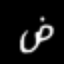

In [ ]:
convert_values_to_image(testing_letters_images.loc[i], True)

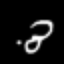

In [ ]:
convert_values_to_image_wtf(testing_letters_images.loc[i], True)

## Comparing Evaluation Metrics between Benchmark Model and Final Model

Making a method which will print all metrics (precision, recall, f1-score and support) with each class in the dataset.

In [ ]:
from sklearn.metrics import classification_report

def get_classification_report(y_true, y_pred):
  print(classification_report(y_true, y_pred))

### Evaluating Final Model using the specified metrics

In [ ]:
y_pred, y_true = get_predicted_classes(model, testing_data_images, testing_data_labels)
get_classification_report(y_true, y_pred)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       120
           1       0.98      1.00      0.99       120
           2       0.91      0.96      0.93       120
           3       0.95      0.97      0.96       120
           4       0.99      0.99      0.99       120
           5       0.99      0.99      0.99       120
           6       0.97      0.99      0.98       120
           7       0.94      0.99      0.97       120
           8       0.89      0.97      0.93       120
           9       0.94      0.99      0.97       120
          10       1.00      0.88      0.93       120
          11       0.99      0.99      0.99       120
          12       0.99      1.00      1.00       120
          13       0.95      0.99      0.97       120
          14       1.00      0.93      0.97       120
          15       0.94      0.99      0.97       120
          16       1.00      0.95      0.97       120
          17       0.96    

### Evaluating Baseline (Benchmark) Model using the specified metrics

In [ ]:
y_pred, y_true = get_predicted_classes(baseline_model, testing_data_images, testing_data_labels)
get_classification_report(y_true, y_pred)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       120
           1       0.07      0.35      0.12       120
           2       0.10      0.07      0.09       120
           3       0.00      0.00      0.00       120
           4       0.00      0.00      0.00       120
           5       0.00      0.00      0.00       120
           6       0.00      0.00      0.00       120
           7       0.00      0.00      0.00       120
           8       0.12      0.78      0.21       120
           9       0.00      0.00      0.00       120
          10       0.00      0.00      0.00       120
          11       0.05      0.17      0.08       120
          12       0.00      0.00      0.00       120
          13       0.00      0.00      0.00       120
          14       0.12      0.12      0.12       120
          15       0.00      0.00      0.00       120
          16       0.06      0.43      0.10       120
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## A Demo to see how the model works on examples of the testing data

Let's recall:
* Letters from ’alef’='أ' to ’yeh’='ى' were encoded to categorical labels from 10 to 37. Then converted it from 0 to 27.

**Recall that we have used One Hot Encoding which transforms integer to a binary matrix where the array contains only one ‘1’ and the rest elements are ‘0’.**

In [ ]:
def get_non_zero_index_from_one_hot_encoding(one_hot_encoding):
  non_zero_index = np.where(one_hot_encoding == 1)[0]
  assert(len(non_zero_index) == 1)
  non_zero_index = non_zero_index[0]
  return non_zero_index

In [ ]:
def convert_categorical_label_to_real_label(categorical_label):
  real_labels = []
  real_labels.extend([x for x in range(10)])
  real_labels.extend(['أ', 'ب', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'س', 'ش', 'ص', 'ض', 'ط', 'ظ', 'ع', 'غ', 'ف', 'ق', 'ك', 'ل', 'م', 'ن', 'ه', 'و', 'ى'])
  return real_labels[categorical_label]

In [ ]:
def show_example(sample_index):
  y_pred, y_true = get_predicted_classes(model, testing_data_images[[sample_index]], testing_data_labels[[sample_index]])
  non_zero_index = get_non_zero_index_from_one_hot_encoding(testing_data_labels[sample_index])
  y_true = y_true[0]
  y_pred = y_pred[0]
  assert y_true == non_zero_index
  true_label = convert_categorical_label_to_real_label(y_true)
  predicted_label = convert_categorical_label_to_real_label(y_pred)
  print("The following image has the written character '{}' but the model predicted it as '{}'".format(true_label, predicted_label))
  return true_label == predicted_label

## Conclusion

**We built a CNN model which can classify the arabic handwritten images into letters. We tested the model on more than 3360 image with all possible classes and got very high accuracy of 96.93%.**